# **Saudi Arabia Used Car Price Prediction with Machine Learning**

## **Contents**

1. Business Problem Understanding 
2. Data Understanding, Data Cleaning, and Features Selection
3. Data Preprocessing and Modeling
4. Conclusion and Recommendation

## **3. Data Preprocessing dan Modeling**

In [49]:
# Import library for data manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import for train-test split and cross-validation
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_validate

# Import pipeline and column transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import encoding techniques
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder

# Import regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Import metrics for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Import SHAP for interpretability
import shap

### **Load Dataset**

In [50]:
# Load the DataFrame from a CSV file
df = pd.read_csv('../data/data_saudi_used_cars_processed.csv')

# Display the contents of the DataFrame
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155,48000
...,...,...,...,...,...,...,...,...,...,...
3649,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3650,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
3651,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3652,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


In [51]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3654 non-null   object 
 1   Region       3654 non-null   object 
 2   Make         3654 non-null   object 
 3   Gear_Type    3654 non-null   object 
 4   Origin       3654 non-null   object 
 5   Options      3654 non-null   object 
 6   Year         3654 non-null   int64  
 7   Engine_Size  3654 non-null   float64
 8   Mileage      3654 non-null   int64  
 9   Price        3654 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 285.6+ KB


### **2. Define X and y**

To predict the price of used cars in Saudi Arabia using machine learning, we first need to define the features X and the target y. The features X include independent variables such as Type, Region, Make, Gear_Type, Origin, Options, Year, Engine_Size, and Mileage, all contribute to the resale price of the car. Meanwhile, the target y is the price of the used car that we aim to predict.

In [52]:
# Separate features (X) and target variable (y) from the DataFrame
X = df.drop(columns='Price')
y = df['Price']

In [53]:
# Display the feature DataFrame (X) and the target Series (y)
display(X, y)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
0,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000
1,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000
2,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000
3,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000
4,Sonata,Riyadh,Hyundai,Automatic,Saudi,Full,2016,2.4,155
...,...,...,...,...,...,...,...,...,...
3649,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500
3650,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000
3651,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794
3652,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000


0       260000
1        42000
2        58000
3        85000
4        48000
         ...  
3649    132000
3650     50000
3651     68000
3652    145000
3653    154000
Name: Price, Length: 3654, dtype: int64

In [54]:
y.describe()

count      3654.000000
mean      79599.456212
std       68688.156594
min       11000.000000
25%       37500.000000
50%       60000.000000
75%       95000.000000
max      575000.000000
Name: Price, dtype: float64

### **3. Data Splitting**

After defining the features X and the target y, the next step in the modeling process is to split the dataset into two parts: the training set and the testing set. This division is crucial to ensure that the model we build can be properly evaluated and does not suffer from overfitting. By separating the data, we can train the model using the training set, while the testing set will be used to assess the model's performance in predicting the prices of previously unseen used cars. In the next step, we will perform the dataset split with an 80% allocation for training and 20% for testing, ensuring that this process is reproducible.

The 80/20 split is a widely adopted method in machine learning that strikes a balance between effective training and thorough evaluation. By dedicating 80% of the data to training, the model can learn from a wide variety of examples, while the remaining 20% serves as a testing set to evaluate the model's performance on new, unseen data. This strategy aids in preventing overfitting and improves the model's ability to generalize.

In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,                  # Features for training and testing
    y,                  # Target variable for training and testing
    test_size=0.2,      # Proportion of the data to include in the test set (20%)
    random_state=42     # Seed for the random number generator to ensure reproducibility
)

In [56]:
# Display the training features, training target, testing features, and testing target
display(X_train, y_train, X_test, y_test)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
2788,X,Riyadh,BMW,Automatic,Other,Standard,2020,3.0,55000
2992,Charger,Taef,Dodge,Automatic,Saudi,Semi Full,2018,1.6,5000
2287,Sonata,Aseer,Hyundai,Automatic,Saudi,Semi Full,2011,2.4,450
1414,Prado,Riyadh,Toyota,Automatic,Gulf Arabic,Full,2017,4.0,39000
2865,Taurus,Riyadh,Ford,Automatic,Saudi,Semi Full,2015,3.6,203000
...,...,...,...,...,...,...,...,...,...
1130,Sunny,Jeddah,Nissan,Automatic,Saudi,Standard,2019,1.5,92000
1294,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000
860,Tahoe,Dammam,Chevrolet,Automatic,Other,Full,2016,5.3,149000
3507,Elantra,Riyadh,Hyundai,Automatic,Saudi,Standard,2017,1.6,99000


2788    266000
2992    125000
2287     18000
1414    151000
2865     55000
         ...  
1130     28500
1294     45000
860     149000
3507     38500
3174     64000
Name: Price, Length: 2923, dtype: int64

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
1313,Yaris,Dammam,Toyota,Automatic,Saudi,Standard,2016,1.5,190000
1674,Tahoe,Dammam,Chevrolet,Automatic,Other,Full,2015,5.7,168000
229,Impala,Dammam,Chevrolet,Automatic,Gulf Arabic,Standard,2018,3.6,112000
3509,Charger,Yanbu,Dodge,Automatic,Saudi,Full,2013,5.7,145000
2222,Carnival,Riyadh,Kia,Automatic,Gulf Arabic,Semi Full,2017,3.8,77000
...,...,...,...,...,...,...,...,...,...
343,Yaris,Jubail,Toyota,Manual,Saudi,Standard,2016,1.5,134000
1752,Cerato,Riyadh,Kia,Automatic,Saudi,Standard,2019,1.6,47000
1598,Copper,Riyadh,MINI,Automatic,Gulf Arabic,Full,2016,2.0,42000
678,Attrage,Dammam,Mitsubishi,Automatic,Saudi,Standard,2019,1.2,19000


1313     26000
1674    110000
229      67000
3509     35000
2222     58000
         ...  
343      23000
1752     46000
1598     95000
678      32000
2895    111500
Name: Price, Length: 731, dtype: int64

### **4. Data Preprocessing**

At this stage, the data used is clean data. However, this data cannot be used directly to create a machine learning model. Categorical features need to be converted into numerical format first, and numerical features also need to be scaled before they can be used in modeling. Scaling features are important to ensure that all numerical inputs are on a similar scale, preventing larger values ​​from disproportionately influencing the model. This improves algorithm performance and convergence, especially for distance-based methods.

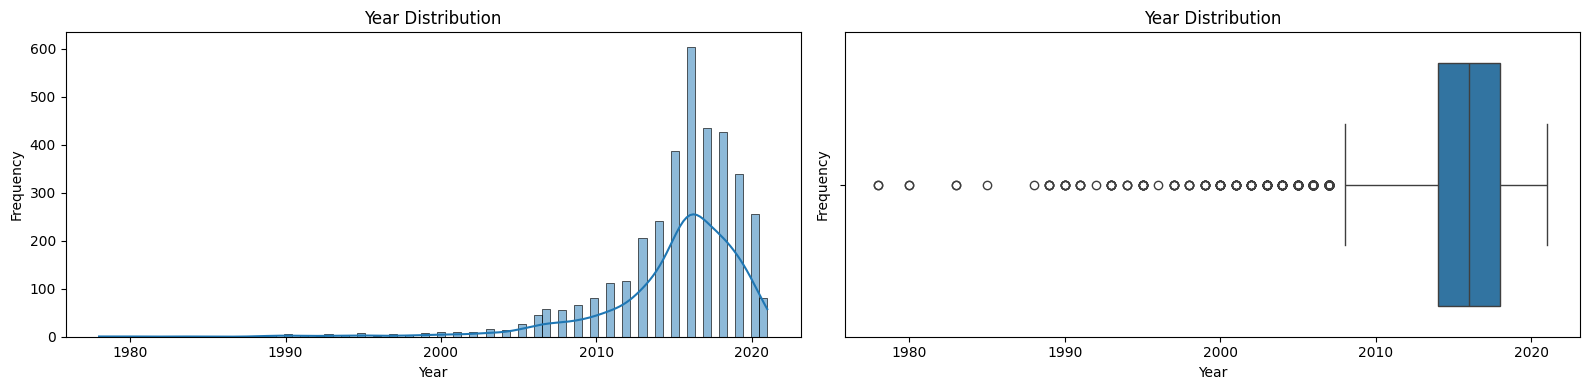

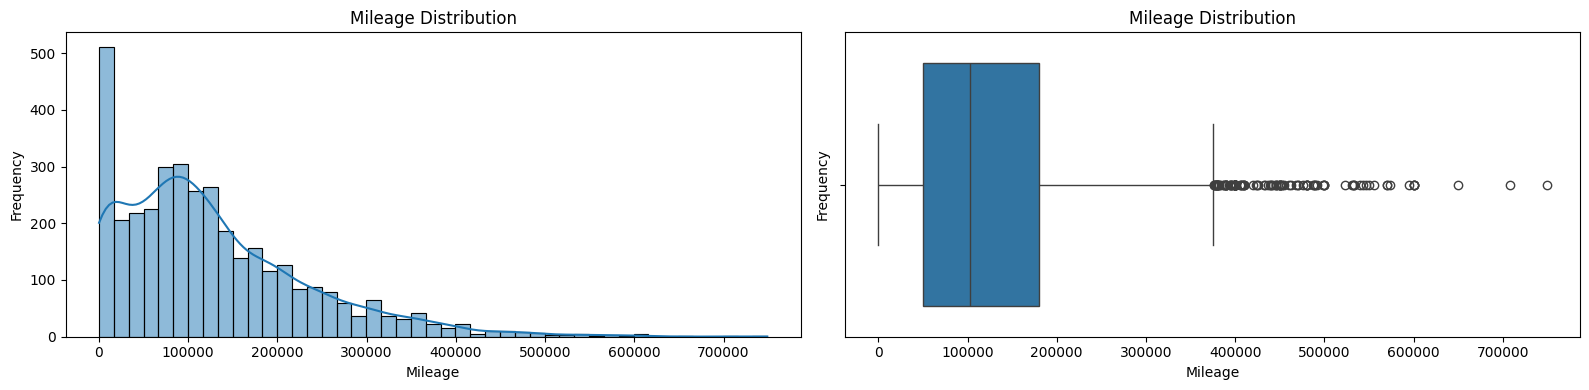

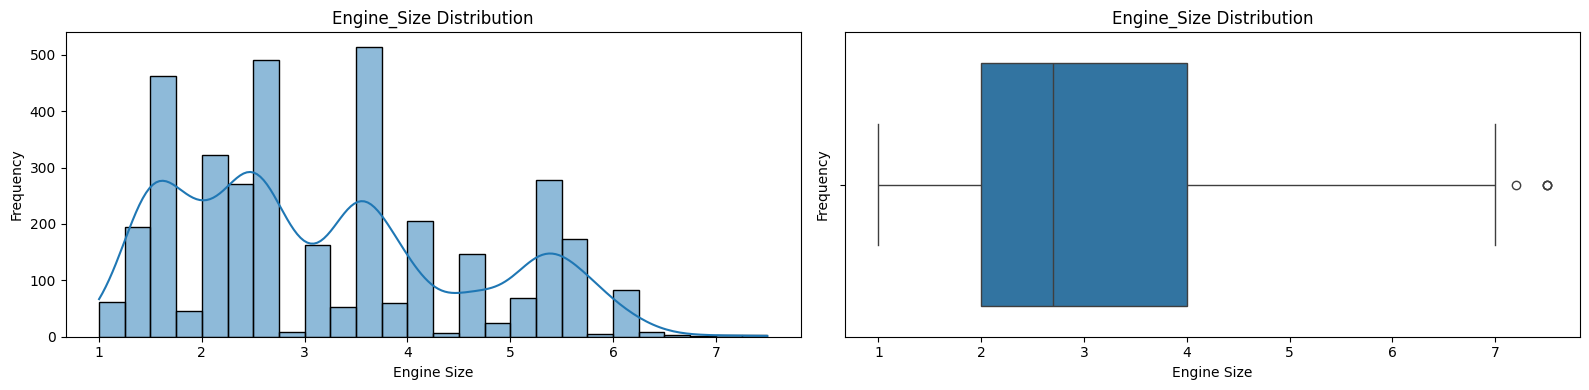

In [57]:
# List of numerical columns to visualize
columns_num = ['Year', 'Mileage', 'Engine_Size']

# Titles for the visualizations
viz_title = [
    'Year Distribution',
    'Mileage Distribution',
    'Engine_Size Distribution',
    ]

# Iterate over each column and its corresponding title
for i, column in enumerate(columns_num):
    plt.figure(figsize=(16, 4)) # Set figure size

    # Create a subplot for histogram and KDE
    plt.subplot(1, 2, 1)
    plt.title(viz_title[i])
    sns.histplot(df[column], kde=True)  # Histogram with KDE
    plt.xlabel(columns_num[i].replace('_', ' '))  # Replace underscores with spaces in labels
    plt.ylabel('Frequency')

    # Create a subplot for box plot
    plt.subplot(1, 2, 2)
    plt.title(viz_title[i])
    sns.boxplot(x=df[column])  # Box plot
    plt.xlabel(columns_num[i].replace('_', ' '))  # Replace underscores with spaces in labels
    plt.ylabel('Frequency')

    # Display the plots
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

The features used for modeling include Type, Region, Make, Gear_Type, Origin, Options, Year, Engine_Size, and Mileage. These features will be utilized to predict Price.

Categorical features such as Type, Region, Make, Gear_Type, Origin, and Options are nominal categorical features. For Type, Region, and Make, the number of categories is relatively large, so we will use Binary Encoding to convert them into numeric form. In contrast, Gear_Type, Origin, and Options have fewer categories, so we will use OneHotEncoder for these.

Features like Year, Engine_Size, and Mileage are numeric. Analysis indicates that these features do not follow a normal distribution, so the scaling options to consider are MinMaxScaler or RobustScaler. Given the presence of outliers in these features, a safer choice would be to use RobustScaler, as it is more resistant to outliers and extreme values.

The following are the transformations that will be performed on the features mentioned.

- BinaryEncoding: Type, Region, Make

- OneHotEncoding: Gear_Type, Origin, Options

- RobustScaler: Year, Engine_Size, Mileage

In [58]:
# Define a ColumnTransformer for different preprocessing tasks
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Type', 'Region', 'Make']),            # Apply BinaryEncoder to 'Type', 'Region', and 'Make'
    ('onehot', OneHotEncoder(), ['Gear_Type', 'Origin', 'Options']),    # Apply OneHotEncoder to 'Gear_Type', 'Origin', and 'Options'
    ('robust', RobustScaler(), ['Year', 'Engine_Size', 'Mileage']),     # Apply RobustScaler to 'Year', 'Engine_Size', and 'Mileage'
], remainder='passthrough')                                             # Pass through other columns without transformation

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('onehot', OneHotEncoder(),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('robust', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

### **3. Modeling**

To determine the best model for prediction, we will test various models from two main categories: Base Models and Ensemble Models.

**Base Models**

The models to be tested include:

- Linear Regression: A simple model effective for linear relationships.

- Ridge Regression: A linear regression variant with regularization to prevent overfitting.

- Lasso Regression: A linear model that selects relevant features through regularization.

- Elastic Net: A combination of Ridge and Lasso for more flexible regularization.

- KNN Regressor: A distance-based model that predicts based on the nearest neighbors.

- Decision Tree Regressor: A non-linear model that splits data based on decisions.

**Ensemble Models**

The models to be tried include:

- Random Forest Regressor: Combines multiple decision trees to improve accuracy.

- Ada Boost Regressor: Optimizes prediction errors from base models through boosting.

- Gradient Boosting Regressor: Gradually adds models to correct previous errors.

- Xtreme Gradient Boosting (XGBoost) Regressor: An optimized version of gradient boosting with enhanced performance.

All these models will be evaluated to determine which one is the most suitable and provides the best results for prediction needs.

In [59]:
# Define different regression algorithms

# Basic Model
# Linear Regression
lr = LinearRegression()

# Ridge Regression with regularization
ridge = Ridge(random_state=42)

# Lasso Regression with regularization
lasso = Lasso(random_state=42)

# ElasticNet Regression, combining L1 and L2 regularization
en = ElasticNet(random_state=42)

# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=3)

# Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Ensemble Model
# Random Forest Regressor, an ensemble method using multiple decision trees
rf = RandomForestRegressor(random_state=42)

# AdaBoost Regressor, an ensemble method that combines weak learners to improve performance
adaboost = AdaBoostRegressor(random_state=42)

# Gradient Boosting Regressor, an ensemble method that builds models sequentially
gradboost = GradientBoostingRegressor(random_state=42)

# XGBoost Regressor, an optimized gradient boosting library
xgboost = XGBRegressor()


To evaluate the performance of regression models, we will use the following scoring metrics:

In [60]:
# List of scoring metrics for evaluating regression models
scorer = [
    'neg_root_mean_squared_error',          # Negative root mean squared error
    'neg_mean_absolute_error',              # Negative mean absolute error
    'neg_mean_absolute_percentage_error'    # Negative mean absolute percentage error
]

#### **1. Cross Validation**

To evaluate the performance of various regression algorithms, we will define a list of models and utilize cross-validation. Cross-validation is a technique that involves splitting the dataset into multiple subsets (or folds). For each iteration, one fold is used for validation while the others are used for training. This process helps ensure that the evaluation of the model's performance is robust and less prone to overfitting.

In [61]:
# List of regression algorithms to evaluate
list_algo = [lr, ridge, lasso, en, knn, tree, rf, adaboost, gradboost, xgboost]

# Lists to store evaluation metrics and their standard deviations
list_rmse = []
list_std_rmse = []

list_mae = []
list_std_mae = []

list_mape = []
list_std_mape = []

# Loop through each algorithm in the list
for algo in list_algo:

    # Define a pipeline that includes preprocessing and model training
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),  # Apply preprocessing steps defined earlier
        ('model', algo)                  # Apply the current model
    ])

    # Define a K-Fold cross-validation strategy
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and compute metrics
    cv_score = cross_validate(
        estimator=pipe_prep_model,       # The pipeline to evaluate
        X=X_train,                       # Training features
        y=y_train,                       # Training target
        cv=crossval,                     # Number of cross-validation folds
        scoring=scorer,                  # List of scoring metrics
    )

    # Append the mean and standard deviation of each metric to the respective lists
    list_rmse.append(cv_score['test_neg_root_mean_squared_error'].mean())
    list_std_rmse.append(cv_score['test_neg_root_mean_squared_error'].std())
    
    list_mae.append(cv_score['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(cv_score['test_neg_mean_absolute_error'].std())
    
    list_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(cv_score['test_neg_mean_absolute_percentage_error'].std())


In [62]:
# Create a DataFrame to store the results of model evaluations
score_cv = pd.DataFrame({
    'model': [str(x).split('(')[0] for x in list_algo],
    'rmse_mean': list_rmse,
    'rmse_std': list_std_rmse,
    'mae_mean': list_mae,
    'mae_std': list_std_mae,
    'mape_mean': list_mape,
    'mape_std': list_std_mape,
})

In [63]:
# Sorting the DataFrame 'score_cv' based on the 'rmse_mean' column
# in descending order (from highest to lowest).
score_cv.sort_values(by='rmse_mean', ascending=False)

,model,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
9,XGBRegressor,-31864.470225,2690.264581,-18006.181752,1362.874180,-0.272911,0.008889
6,RandomForestRegressor,-33817.631651,1897.008529,-18568.641221,860.998229,-0.286076,0.006685
8,GradientBoostingRegressor,-36020.252964,3086.721826,-21211.772684,1628.314482,-0.318852,0.015454
4,KNeighborsRegressor,-36363.117108,3745.678586,-20522.138012,1261.921637,-0.328637,0.012755
5,DecisionTreeRegressor,-47725.029183,4191.574970,-24938.090515,1463.332397,-0.365888,0.035627
1,Ridge,-50668.668937,5335.875510,-32885.142223,1982.073907,-0.606862,0.035691
2,Lasso,-50674.673208,5339.428043,-32895.645758,1987.466337,-0.607237,0.035782
0,LinearRegression,-50678.158060,5338.668842,-32900.477058,1987.816246,-0.607385,0.035803
3,ElasticNet,-55011.751870,5453.820927,-34685.782714,2040.419197,-0.605482,0.021134
7,AdaBoostRegressor,-57770.315175,2013.670622,-49762.541720,1987.321092,-1.082164,0.064093


In [64]:
# Sorting the DataFrame 'score_cv' based on the 'mae_mean' column
# in descending order (from highest to lowest).
score_cv.sort_values(by='mae_mean', ascending=False)

,model,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
9,XGBRegressor,-31864.470225,2690.264581,-18006.181752,1362.874180,-0.272911,0.008889
6,RandomForestRegressor,-33817.631651,1897.008529,-18568.641221,860.998229,-0.286076,0.006685
4,KNeighborsRegressor,-36363.117108,3745.678586,-20522.138012,1261.921637,-0.328637,0.012755
8,GradientBoostingRegressor,-36020.252964,3086.721826,-21211.772684,1628.314482,-0.318852,0.015454
5,DecisionTreeRegressor,-47725.029183,4191.574970,-24938.090515,1463.332397,-0.365888,0.035627
1,Ridge,-50668.668937,5335.875510,-32885.142223,1982.073907,-0.606862,0.035691
2,Lasso,-50674.673208,5339.428043,-32895.645758,1987.466337,-0.607237,0.035782
0,LinearRegression,-50678.158060,5338.668842,-32900.477058,1987.816246,-0.607385,0.035803
3,ElasticNet,-55011.751870,5453.820927,-34685.782714,2040.419197,-0.605482,0.021134
7,AdaBoostRegressor,-57770.315175,2013.670622,-49762.541720,1987.321092,-1.082164,0.064093


In [65]:
# Sorting the DataFrame 'score_cv' based on the 'mape_mean' column
# in descending order (from highest to lowest).
score_cv.sort_values(by='mape_mean', ascending=False)

,model,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
9,XGBRegressor,-31864.470225,2690.264581,-18006.181752,1362.874180,-0.272911,0.008889
6,RandomForestRegressor,-33817.631651,1897.008529,-18568.641221,860.998229,-0.286076,0.006685
8,GradientBoostingRegressor,-36020.252964,3086.721826,-21211.772684,1628.314482,-0.318852,0.015454
4,KNeighborsRegressor,-36363.117108,3745.678586,-20522.138012,1261.921637,-0.328637,0.012755
5,DecisionTreeRegressor,-47725.029183,4191.574970,-24938.090515,1463.332397,-0.365888,0.035627
3,ElasticNet,-55011.751870,5453.820927,-34685.782714,2040.419197,-0.605482,0.021134
1,Ridge,-50668.668937,5335.875510,-32885.142223,1982.073907,-0.606862,0.035691
2,Lasso,-50674.673208,5339.428043,-32895.645758,1987.466337,-0.607237,0.035782
0,LinearRegression,-50678.158060,5338.668842,-32900.477058,1987.816246,-0.607385,0.035803
7,AdaBoostRegressor,-57770.315175,2013.670622,-49762.541720,1987.321092,-1.082164,0.064093


Based on the table above, XGBRegressor shows the best performance with the lowest average RMSE, MAE, and MAPE values. This model will be used as a benchmark to find the best model based on the prediction results on the test data. If overfitting is detected, other models with the best performance after XGBRegressor will be considered as candidates for the best benchmark.

**Predicting the Test Set with the Benchmark Model**

Predictions on the test set will be made using the XGBoost model.

In [66]:
# Define the list of models to evaluate
list_algo = [xgboost]

# Initialize lists to store the performance scores
score_rmse = []
score_mae = []
score_mape = []

# Predict on the test set
for algo in list_algo:
    # Create a pipeline with preprocessing and model
    model = Pipeline([
        ('preprocessing', transformer),
        ('model', algo)
    ])

    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate and store performance metrics
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Create a DataFrame to store the results of model evaluations
score_before_tuning = pd.DataFrame({
    'model': [str(x).split('(')[0] for x in list_algo],  # Extract model names from the list
    'score_rmse': score_rmse,                            # Store RMSE scores
    'score_mae': score_mae,                              # Store MAE scores
    'score_mape': score_mape                             # Store MAPE scores
})

# Display the DataFrame
score_before_tuning

,model,score_rmse,score_mae,score_mape
0,XGBRegressor,27085.84955,14884.088661,0.232421


In [67]:
# Selecting the 10th row from the score_cv DataFrame to view the benchmark model performance metrics
score_cv.iloc[[9]]

,model,rmse_mean,rmse_std,mae_mean,mae_std,mape_mean,mape_std
9,XGBRegressor,-31864.470225,2690.264581,-18006.181752,1362.87418,-0.272911,0.008889


Based on the results above, the XGBRegressor model is not overfitting and can be considered the best benchmark model. This can be seen from the metrics used:

- RMSE decrease
    
    - Train: 31,864.47
    
    - Test: 27,085.85
    
- MAE decrease
    
    - Train: 18,006.18
    
    - Test: 14,884.09
    
- MAPE decrease
    
    - Train: 0.2729
    
    - Test: 0.2324
    
The results on the test data demonstrate better performance compared to the training data.

The RMSE (Root Mean Square Error) value which is greater than the MAE (Mean Absolute Error) indicates that the prediction model experiences larger errors on some data points, especially outliers. RMSE is more sensitive to extreme values ​​because it squares the errors before averaging, so large errors have a more significant impact. This situation indicates that the model may need to be improved to handle unusual data, so that the prediction results become more accurate and reliable.

#### **2. Hyper Parameter Tuning**

Based on previous results, the XGBRegressor model is the best benchmark model. The next step in an effort to improve model performance is to perform hyperparameter tuning on XGBRegressor. This process is expected to improve prediction accuracy by adjusting existing parameters, resulting in more optimal results.

XGBoost (Extreme Gradient Boosting) is a popular and effective machine learning library for regression, classification, and ranking problems. XGBoost performs decision tree boosting in a parallel and distributed manner, making it very efficient.

XGBoost uses gradient boosting, which combines multiple weak predictive models into one strong model. Each weak model focuses on correcting the errors of the previous model, and this process is done iteratively to improve the model’s performance.

To prevent overfitting—when the model overfits to the training data—XGBoost applies L1 and L2 regularization. These techniques give different weights to each feature based on its significance to the target variable.

Source: [Algoritme XGBoost dengan Contohnya](https://dindaadi.medium.com/algoritme-xgboost-dengan-contohnya-28e958a3e2f6)

Untuk memandu proses hyperparameter tuning, referensi dari dokumentasi resmi [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters) akan digunakan sebagai acuan.

1. Maximum Depth of Trees (`max_depth`)

This parameter sets the maximum depth of each tree in the model. A higher max_depth allows the model to capture more complex patterns in the data. However, if the depth is too high, the model may overfit, meaning it learns too much from the training data and fails to generalize to unseen data.

2. Learning Rate (`learning_rate`)

The learning rate controls the step size taken during the training process. A smaller learning rate often leads to more stable and accurate models but requires more trees (estimators) to converge effectively.

3. Number of Trees (`n_estimators`)

This parameter specifies the total number of trees to build in the ensemble. Generally, increasing the number of trees enhances the model's performance, up to a point where it may start to overfit.

4. Fraction of Training Rows Used by Each Tree (`subsample`)

This parameter determines the proportion of the training data used to grow each tree. Lower values can help reduce overfitting by providing more diverse training samples for each tree.

5. Gamma (`gamma`)

Gamma, or minimum impurity decrease, regulates the complexity of the model by defining the required reduction in impurity for a node split. Higher values lead to a more conservative model, reducing the likelihood of overfitting. 

6. Fraction of Features Used by Each Tree (`colsample_bytree`)

This parameter specifies the proportion of features used for each tree. Adjusting this can increase model diversity and reduce overfitting.

7. Alpha (Regularization) (`reg_alpha`)

This regularization parameter helps control overfitting by penalizing model complexity. Higher values encourage a simpler model, which can be beneficial for generalization.

8. Random State (`random_state`)

This parameter ensures consistent and reproducible results by controlling the random initialization of the model. Exploring different random states allows for a robust evaluation of model performance.

In [68]:
# Maximum Depth of Trees
max_depth = list(np.arange(1, 11))

# Learning Rate
learning_rate = list(np.arange(1, 100) / 100)

# Number of Trees
n_estimators = list(np.arange(100, 201))

# Fraction of Training Rows to be Used by Each Tree (% of total training rows)
subsample = list(np.arange(2, 10) / 10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Larger values make the model more conservative/simpler

# Fraction of Features to be Used by Each Tree (% of total features in training set)
colsample_bytree = list(np.arange(1, 10) / 10)

# Alpha (Regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Larger values make the model more conservative/simpler

# Define a list of random states for reproducibility and robustness
random_state = list(np.arange(0, 43))  # Different seeds to explore various initializations

# Hyperparameter Space for XGBoost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__random_state': random_state,
}

Random search is an efficient method for hyperparameter tuning in machine learning. Unlike grid search, which systematically tests all combinations, random search selects hyperparameter combinations randomly from the search space. This approach is often faster and more effective, especially when the number of hyperparameters is large, helping to find optimal configurations with fewer computational resources.

To enhance the reliability of the results, random search is often combined with cross-validation techniques, such as K-Fold. By using cross-validation, the dataset is divided into several subsets, allowing the model to be trained and tested repeatedly with various combinations of data. This approach not only helps reduce the risk of overfitting but also provides a more accurate evaluation of the model's performance. The combination of random search and cross-validation allows for the efficient discovery of optimal hyperparameter configurations.

In the hyperparameter optimization process, the model will be retrained based on the best performance measured by RMSE. Although various metrics can be used for evaluation, only one metric is selected for refitting, ensuring a focus on reducing prediction error. RMSE gives more weight to larger errors, meaning the model will focus more on improving predictions that are far from the actual values.

In [69]:
# Benchmark model with hyperparameter tuning
xgb = XGBRegressor(ranndom_state=None, verbosity=0)

# Create a pipeline combining preprocessing and the XGBoost model
estimator_xgb = Pipeline([
    ('preprocessing', transformer),
    ('model', xgb)
])

# Define the cross-validation strategy with shuffling
crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform hyperparameter tuning using RandomizedSearchCV
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions=hyperparam_space_xgb,  # Define the hyperparameter space to search
    n_iter=100,                                # Number of different hyperparameter combinations to try
    cv=crossval,                              # Cross-validation strategy
    scoring=[
        'neg_root_mean_squared_error', 
        'neg_mean_absolute_error', 
        'neg_mean_absolute_percentage_error',
        ], 
    refit='neg_root_mean_squared_error',      # Optimize based on RMSE, only one metric can be chosen for refitting
    random_state=0,                           # Ensure reproducibility
    n_jobs=-1,                                # Use all available CPUs for computation
)

In [70]:
# Fitting training data to find the best parameters
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make']),
                                                                              ('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               ['Year',
                                                                                'Engine_Size',
                                                                                'Mileage'])])),
                                             ('model',...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [71]:
# Check the best scores and params
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -29683.187056602725
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(0.0027825594022071257), 'model__random_state': np.int64(38), 'model__n_estimators': np.int64(164), 'model__max_depth': np.int64(7), 'model__learning_rate': np.float64(0.1), 'model__gamma': np.int64(9), 'model__colsample_bytree': np.float64(0.6)}


#### **3. Final Model**

After tuning, the following is the XGBRegressor model with the best parameters obtained. After obtaining the model from the tuning, the model is tested on the test data to evaluate its performance.

In [72]:
# Retrieve the best estimator found during hyperparameter tuning
xgb_tuning = random_xgb.best_estimator_
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gear_Type', 'Origin',
                                                   'Options']),
                                                 ('robust', RobustScaler(),
                                                  ['Year', 'Engine_Size',
                                                   'Mileage'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=Non...
                              interaction_constraints=None,
                              learning_rate=np.float64(0.1), max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=np.int64(7),
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=np.int64(164),
                              n_jobs=None, num_parallel_tree=None,
                              random_state=np.int64(38), ...))])

In [73]:
X_train['Type'].unique()

array(['X', 'Charger', 'Sonata', 'Prado', 'Taurus', 'Tahoe', 'Duster',
       'Sunny', 'Wrangler', 'Furniture', 'Levante', 'Land Cruiser',
       'Elantra', 'X-Trail', 'Expedition', 'Cerato', 'C300', 'Accent',
       'H1', 'Land Cruiser Pickup', 'Corolla', 'ES', 'D-MAX', 'Tiggo',
       'GTB 599 Fiorano', 'CX9', 'Innova', 'Land Cruiser 70', 'Pajero',
       'KICKS', 'Camry', 'Caprice', 'Hilux', 'S', 'Yukon', 'IS',
       'Sportage', 'GS', 'Suburban', 'Avalon', 'LS', 'Silverado', '6',
       'Optima', 'Sentra', 'Azera', 'Altima', 'Malibu', 'Delta',
       'Victoria', 'EC8', 'Dyna', 'SRT', 'Rio', 'Sorento', 'Yaris',
       'Sierra', 'Hiace', 'A8', 'Fusion', 'RX', 'Accord', 'Odyssey',
       'Juke', 'Senta fe', 'FJ', 'Navara', 'Rav4', 'Patrol', 'X7',
       'Explorer', 'Datsun', '3', 'Q5', 'Koleos', 'CX7', 'Focus', 'EC7',
       'Tucson', 'Cressida', 'Previa', 'G80', 'Traverse', 'SEL',
       'Echo Sport', 'Impala', 'Range Rover', 'E', 'The 7', 'S300', 'C',
       'Seven', 'RX8', 'VTC', '

**Predict to Test Set with the Tuned Model**

Perform predictions on the test set using the XGBoost model and selected hyperparameters.

In [74]:
# Fit the best model on the training data
xgb_tuning.fit(X_train, y_train)

# Predict on the test set using the tuned model
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Calculate and store the performance metrics (RMSE, MAE, and MAPE) after tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

# Create a DataFrame to store the performance metrics after tuning
score_after_tuning = pd.DataFrame({
    'model': [str(x).split('(')[0] for x in [xgb_tuning['model']]],     # Extract model names from the list
    'score_rmse': rmse_xgb_tuning,                                      # Store RMSE scores
    'score_mae': mae_xgb_tuning,                                        # Store MAE scores
    'score_mape': mape_xgb_tuning                                       # Store MAPE scores
})

# Display the DataFrame
score_after_tuning

,model,score_rmse,score_mae,score_mape
0,XGBRegressor,24198.50246,13612.291113,0.219432


### **4. Evaluation Model**

The model performance after tuning is then compared to the model performance before tuning to determine whether tuning has improved the quality of predictions.

#### **Performance Comparison**

Comparison of XGBoost model performance before and after hyperparameter tuning.

In [75]:
# Performance before hyperparameter tuning
score_before_tuning

,model,score_rmse,score_mae,score_mape
0,XGBRegressor,27085.84955,14884.088661,0.232421


In [76]:
# Performance after hyperparameter tuning
score_after_tuning

,model,score_rmse,score_mae,score_mape
0,XGBRegressor,24198.50246,13612.291113,0.219432


After performing hyperparameter tuning, the model demonstrates improved performance, evident from the reduction in RMSE, MAE, and MAPE values. The decrease in RMSE indicates enhanced accuracy in predicting target values, while the reduction in MAE signifies better consistency in absolute errors. Additionally, the improvement in MAPE shows that relative errors have also decreased, making the model more effective for business applications. The tuned model is the best model.

The obtained MAPE value is approximately 21%. Although it appears high, this error value is still considered within the range of a 'reasonable forecast' (Diep et al., 2024).

#### **Scatter Plot Actual Price vs Predicted Price**

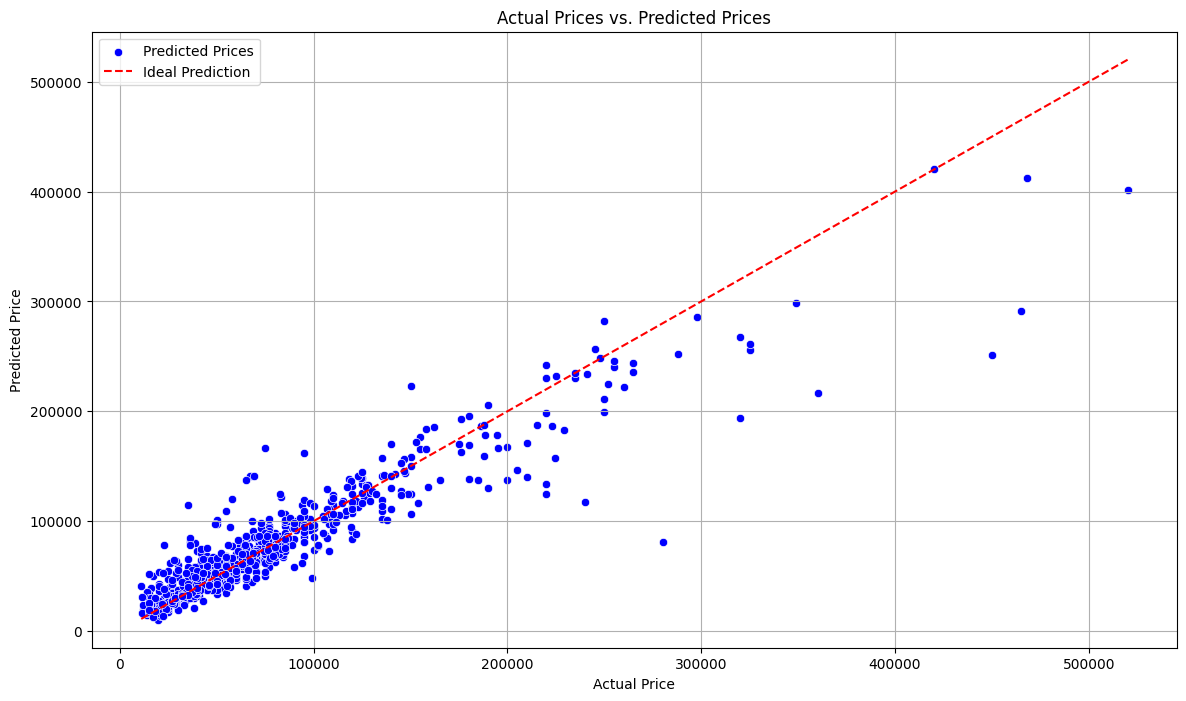

In [77]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a scatter plot
sns.scatterplot(x=y_test, y=y_pred_xgb_tuning, color='blue', label='Predicted Prices')

# Add a y=x line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')

# Add title and axis labels
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# b

A scatter plot of predicted values versus actual values provides insight into model performance. If many points are close to the diagonal line (y = x), the model is considered effective. Patterns or outliers may indicate inaccuracies. If points spread further from the line as actual values increase, this suggests rising variance.

Based on this visualization, the model demonstrates good capability in predicting new data, reflecting adequate generalization ability. However, when the actual price exceeds 200,000 SAR, the prediction accuracy appears less optimal, likely due to a lack of data in that price range. This indicates the need for additional data to improve the model's performance in higher price ranges.

In [78]:
y_test.describe()

count       731.000000
mean      77442.612859
std       65393.601915
min       11000.000000
25%       37000.000000
50%       58000.000000
75%       90000.000000
max      520000.000000
Name: Price, dtype: float64

#### **Residual Plot Actual Price vs Predicted Price**

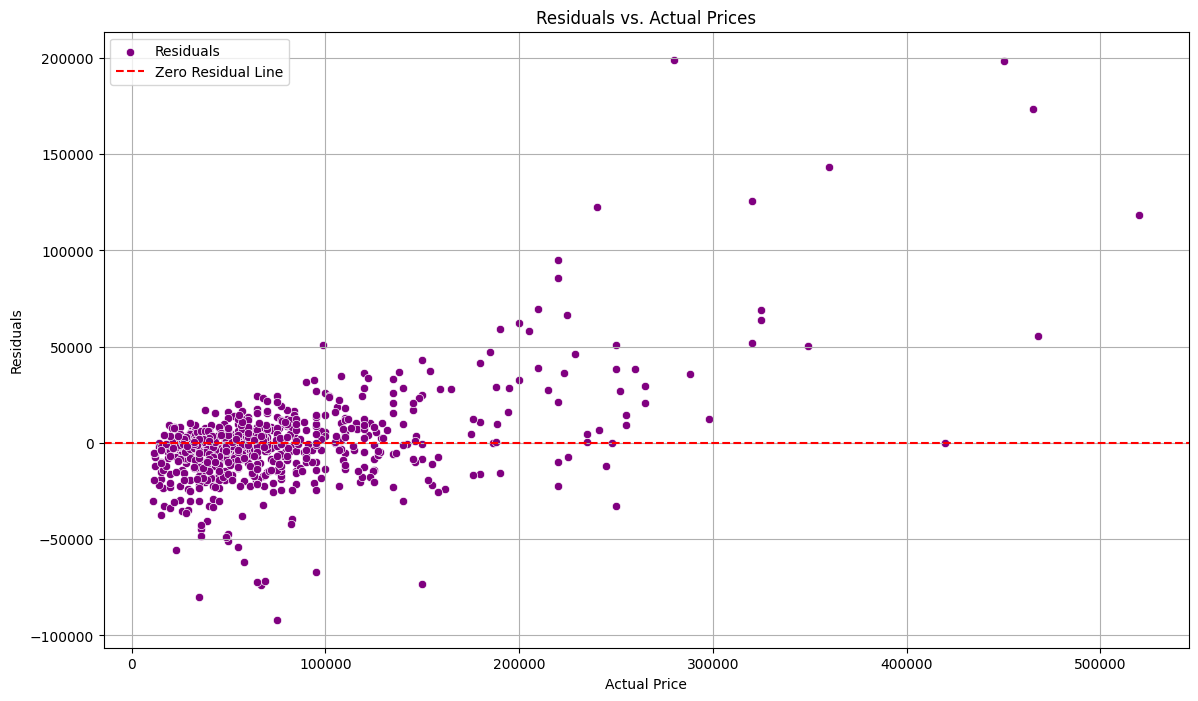

In [79]:
# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Actual Price': y_test,
    'Residuals': y_test -  y_pred_xgb_tuning
})

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a residual plot using seaborn
sns.scatterplot(x='Actual Price', y='Residuals', data=df, color='purple', label='Residuals')

# Add a horizontal line at y=0
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')

# Add title and axis labels
plt.title('Residuals vs. Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
# b

A residual plot displays the differences between predicted and actual values on the y-axis against predicted values on the x-axis, serving as a diagnostic tool for regression models. Ideally, residuals should be randomly scattered around zero, indicating an effective model. Clear patterns or variations in residual spread may suggest issues like model inadequacy or heteroscedasticity. Large residuals can indicate outliers that warrant further investigation.

Based on this visualization, the model demonstrates good capability in predicting new data, reflecting adequate generalization ability. However, when the actual price exceeds 200,000, the prediction accuracy appears less optimal, likely due to a lack of data in that price range. This indicates the need for additional data to improve the model's performance in higher price ranges.

#### **Feature Importances**

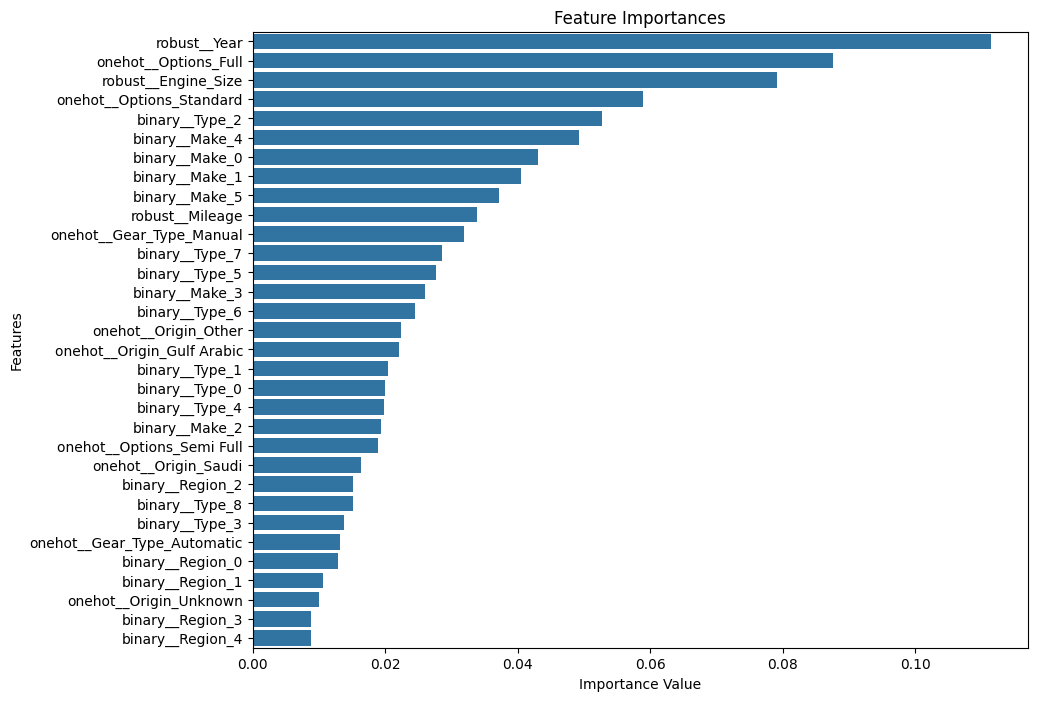

In [80]:
# Plot feature importances

# Extract feature importances from the best model found by RandomizedSearchCV
feature_imp = pd.DataFrame(
    xgb_tuning['model'].feature_importances_,  # Get feature importances from the trained model
    index=xgb_tuning['preprocessing'].get_feature_names_out(),  # Get feature names from the preprocessing pipeline
    columns=['Value']  # Column name for the feature importance values
).sort_values(by='Value', ascending=False)  # Sort features by their importance in descending order

# Plotting
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.barplot(data=feature_imp, x='Value', y=feature_imp.index)  # Create a bar plot of feature importances
plt.title('Feature Importances')  # Set the title of the plot
plt.xlabel('Importance Value')  # Set the x-axis label
plt.ylabel('Features')  # Set the y-axis label
plt.show()  # Display the plot

Based on this visualization, these features are the ones that influence the determination of Price, ranked from the most to the least influential.

#### **Shapley Value of Explanations (SHAP)**

In [81]:
feature_names = X.columns

prep = xgb_tuning['preprocessing']
prep.fit(X_train)

feature_names = list(prep.get_feature_names_out())
X_train_transformed = pd.DataFrame(prep.transform(X_train), columns=feature_names)
X_test_transformed = pd.DataFrame(prep.transform(X_test), columns=feature_names)

best_model = xgb_tuning['model']

 99%|===================| 2905/2923 [00:33<00:00]        

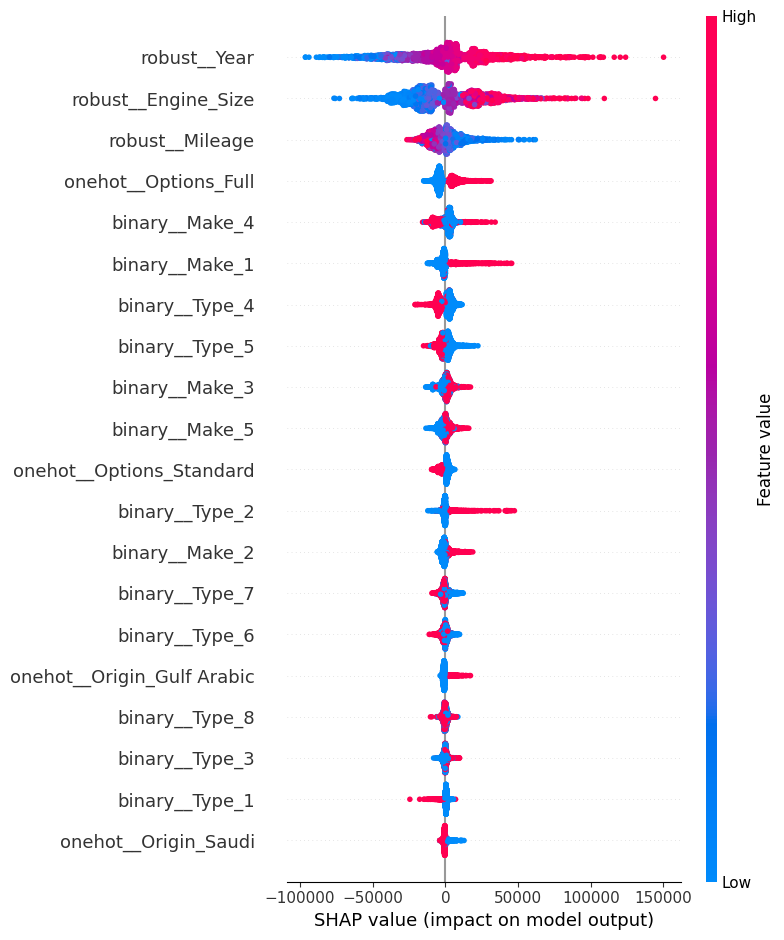

In [82]:
# define explainer
explainer = shap.TreeExplainer(
    best_model,
    data = X_train_transformed,
    # feature_dependence="independent",
    # model_output="probability"    
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer.shap_values(X_train_transformed)

# tampilkan dalam bentuk plot
shap.summary_plot(shap_values, X_train_transformed, feature_names = feature_names)

Based on the visualization, the following information is obtained:

- The newer the production year of the car, the higher its price.

- The larger the engine size, the more expensive the car.

- The lower the mileage, the higher the car's price.

- Cars with the "Full" option tend to be more expensive.

- Cars with the *Make 4* feature set to 1 tend to have higher prices.

- Cars with the *Make 1* feature set to 1 tend to be more expensive.

- Cars with the *Type 4* feature set to 0 tend to have higher prices.

- Cars with the *Type 5* feature set to 0 tend to be more expensive.

- Cars with the *Make 3* feature set to 1 tend to have higher prices.

- Cars with the *Make 5* feature set to 1 tend to be more expensive.

- Cars with non-standard options tend to have higher prices.

- Cars with the *Type 2* feature set to 1 tend to be more expensive.

- Cars with the *Make 2* feature set to 1 tend to have higher prices.

- Cars with the *Type 7* feature set to 0 tend to be more expensive.

- Cars with the *Type 6* feature set to 0 tend to have higher prices.

- Cars originating from the Gulf Arabic region tend to be more expensive.

- Cars with the *Type 8* feature set to 1 tend to have higher prices.

- Cars with the *Type 3* feature set to 1 tend to be more expensive.

- Cars with the *Type 1* feature set to 0 tend to have higher prices.

- Cars not originating from Saudi Arabia tend to have higher prices.

Based on the information, the characteristics that lead to cars being increasingly expensive include:

- Newer production year

- Larger engine size

- Lower mileage

- Full options

- Originating from the Gulf Arabic region

The characteristics that lead to cars being less expensive include:

- Older production year

- Smaller engine size

- Higher mileage

- Standard options

- Originating from Saudi Arabia


#### **Shapley Value of Explanations (SHAP) Per Observation Feature**

In [83]:
# Start js (must have)
shap.initjs()

In [84]:
# buat force_plot

def shap_plot(j, model, S):

    # define explainer
    explainerModel = shap.TreeExplainer(model)

    # shap value untuk baris tertentu
    shap_values_Model = explainerModel.shap_values(S)

    # force_plot
    p = shap.plots.force(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    
    # shap.save_html('test.html', p)

    # Close the plot to prevent display issues
    # plt.close()

    return p

**Test Data at index 0**

In [85]:
# The X feature
X_test.iloc[[0]]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage
1313,Yaris,Dammam,Toyota,Automatic,Saudi,Standard,2016,1.5,190000


In [86]:
# The target feature
y_test.iloc[[0]]

1313    26000
Name: Price, dtype: int64

In [87]:
shap_plot(0, best_model, X_test_transformed)

In [88]:
display(
    X_test['Engine_Size'].describe(), 
    X_test_transformed['robust__Engine_Size'].describe()
)

count    731.000000
mean       3.088372
std        1.370037
min        1.000000
25%        2.000000
50%        2.700000
75%        4.000000
max        6.400000
Name: Engine_Size, dtype: float64

count    731.000000
mean       0.194186
std        0.685019
min       -0.850000
25%       -0.350000
50%        0.000000
75%        0.650000
max        1.850000
Name: robust__Engine_Size, dtype: float64

In [89]:
display(
    X_test['Mileage'].describe(), 
    X_test_transformed['robust__Mileage'].describe()
)

count       731.000000
mean     128858.786594
std      105970.851372
min         100.000000
25%       53000.000000
50%      105000.000000
75%      183000.000000
max      600000.000000
Name: Mileage, dtype: float64

count    731.000000
mean       0.197395
std        0.808938
min       -0.785496
25%       -0.381679
50%        0.015267
75%        0.610687
max        3.793893
Name: robust__Mileage, dtype: float64

In [90]:
y.describe()

count      3654.000000
mean      79599.456212
std       68688.156594
min       11000.000000
25%       37500.000000
50%       60000.000000
75%       95000.000000
max      575000.000000
Name: Price, dtype: float64

Pengamatan pada indeks-0 dari X_test, data memiliki `robust__Engine_Size = -0.6`, `binary_Type_4 = 1`, `onehot_Options_Full = 0`, `robust__Mileage = 0.6641`, `onehot__Options_Standard = 1`, `binary_Make_1 = 0`, `binary_Make_5 = 0`, `binary_Type_5 = 1`, `binary_Type_6 = 0`.

Secara singkat, ini berarti mobil tersebut adalah mobil dengan `engine size yang kecil` (kurang dari Q1 engine size), `opsi Standar`, dan `mileage yang tinggi` (lebih dari Q3 mileage). Model memperkirakan harga mobil adalah 28,924.07 SAR. Harga ini termasuk murah (kurang dari Q1 harga). Harga sebenarnya juga menunjukkan harga yang mirip, yaitu 26000 SAR.

### **5. Save Model**

In [91]:
# Save model
import pickle

In [92]:
pickle.dump(xgb_tuning, open('../model/Model_SaudiArabiaUsedCars_XGB.sav', 'wb'))

In [93]:
# Load model
model_path = '../model/Model_SaudiArabiaUsedCars_XGB.sav'
loaded_model = pickle.load(open(model_path, 'rb'))

In [94]:
pred_model = loaded_model.predict(X_test)

In [95]:
# Calculate and store the performance metrics (RMSE, MAE, and MAPE) after tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

In [96]:
print(f'rmse_xgb_tuning: {rmse_xgb_tuning}')
print(f'mae_xgb_tuning: {mae_xgb_tuning}')
print(f'mape_xgb_tuning: {mape_xgb_tuning}')

rmse_xgb_tuning: 24198.502460134623
mae_xgb_tuning: 13612.291113147658
mape_xgb_tuning: 0.21943159479785881
